## **Lógica Fuzzy Exemplo da Gorjeta**

Adaptado do trabalho disponível em [pythonhosted.org](https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem_newapi.html)

O problema trata de definir o valor da gorjeta em um restaurante com base na qualidade do serviço e da comida.

* **Entrada (antecedentes):**

> Qualidade da Comida
>> Universo do discurso (intervalo de valores nítidos/*crisp*): 0 a 10

>> Conjunto difuso (valores difusos): péssima, comível, deliciosa

> Qualidade do Serviço
>> Universo do discurso (intervalo de valores nítidos/*crisp*): 0 a 10

>> Conjunto difuso (valores difusos): ruim, aceitável, excelente


* **Saída (consequentes):**

> Gorjeta

>> Universo do discurso (valores nítidos/*crisp*): 0 a 25%

>> Conjunto difuso (valores difusos): baixa, média, alta

### Regras de Decisão

> **SE** o serviço foi excelente **OU** a comida estava deliciosa **ENTÃO** a gorjeta deve ser alta

> **SE** o serviço foi aceitável **ENTÃO** a gorjeta deve ser média

> **SE** o serviço foi ruim **E** a comida estava péssima **ENTÃO** a gorjeta deve ser baixa



In [ ]:
# Instalar o pacote skfuzzy e networkx
# !pip install networkx">=2.5"
!pip install scikit-fuzzy

**Cria as variáveis de entrada e de saída**

In [2]:
# importa as bibliotecas necessárias
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [3]:
# Cria as variáveis do problema
# Variáveis de Entrada - comida e serviço
comida = ctrl.Antecedent(np.arange(0, 11, 1), 'comida')
servico = ctrl.Antecedent(np.arange(0, 11, 1), 'servico')

# Variáveis de Saída - gorjeta
gorjeta = ctrl.Consequent(np.arange(0, 26, 1), 'gorjeta')

In [4]:
# Cria automaticamente o mapeamento entre valores nítidos e difusos
# usando uma função de pertinência triangular
comida.automf(names=['péssima', 'comestível', 'deliciosa'])

In [5]:
# Cria as funções de pertinência usando tipos variados,
# porém, não de forma automática (manual)
servico['ruim'] = fuzz.trimf(servico.universe, [0, 0, 5])
servico['aceitável'] = fuzz.gaussmf(servico.universe, 5, 2)
servico['excelente'] = fuzz.gaussmf(servico.universe, 10,3)

gorjeta['baixa'] = fuzz.trimf(gorjeta.universe, [0, 0, 13])
gorjeta['média'] = fuzz.trapmf(gorjeta.universe, [0, 13,15, 25])
gorjeta['alta'] = fuzz.trimf(gorjeta.universe, [15, 25, 25])

**Mostra os gráficos das funções de pertinência**

t:\GitHub\College_tasks\venv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


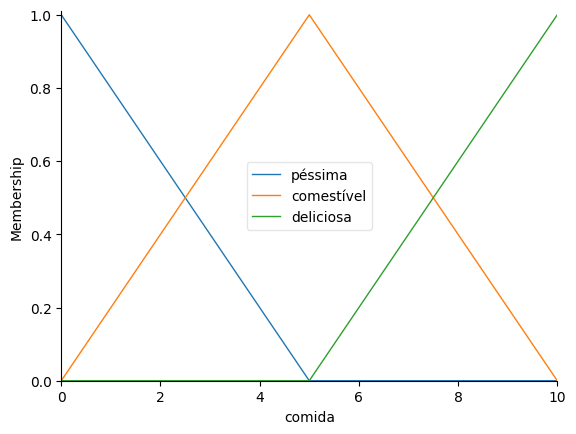

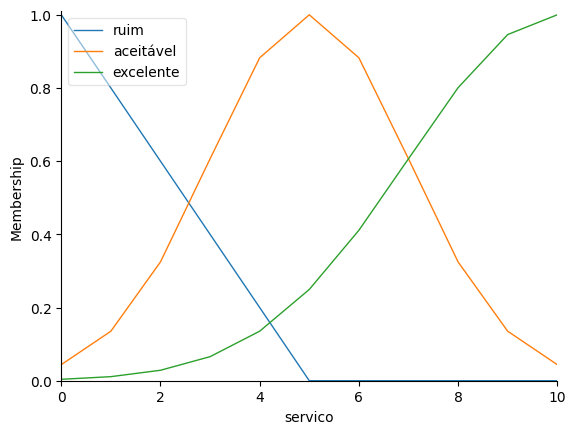

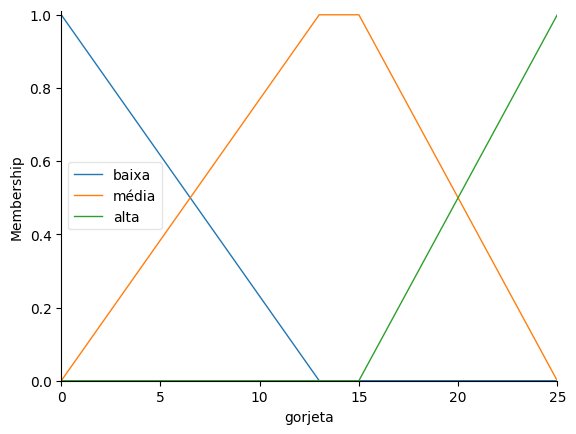

In [6]:
comida.view()
servico.view()
gorjeta.view()

**Cria as regras fuzzy**

In [7]:
regra1 = ctrl.Rule(servico['ruim'] | comida['péssima'], gorjeta['baixa'])
regra2 = ctrl.Rule(servico['aceitável'], gorjeta['média'])
regra3 = ctrl.Rule(servico['excelente'] | comida['deliciosa'], gorjeta['alta'])

**Cria Controlador Fuzzy e Efetua a Simulação**

In [8]:
gorjeta_ctrl = ctrl.ControlSystem([regra1, regra2, regra3])
gorjeta_simulador = ctrl.ControlSystemSimulation(gorjeta_ctrl)

# Entrando com alguns valores para qualidade da comida e do serviço
gorjeta_simulador.input['comida'] = 3.5
gorjeta_simulador.input['servico'] = 9.3

# Computando o resultado
gorjeta_simulador.compute()
print(gorjeta_simulador.output['gorjeta'])

15.188498519971416


**Mostrando o resultado graficamente**

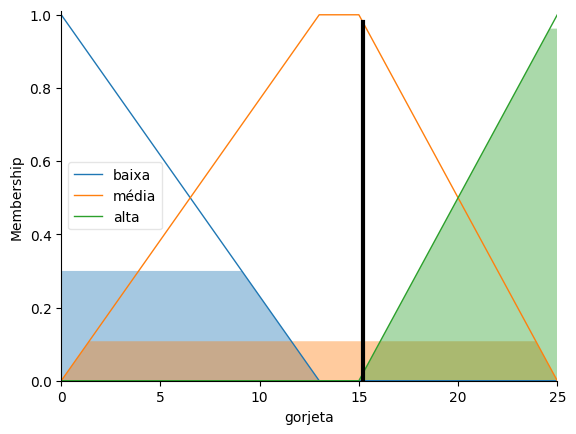

In [9]:
gorjeta.view(sim=gorjeta_simulador)

**Pode-se visualizar graficamente as variáveis de entrada (comida e serviço)**

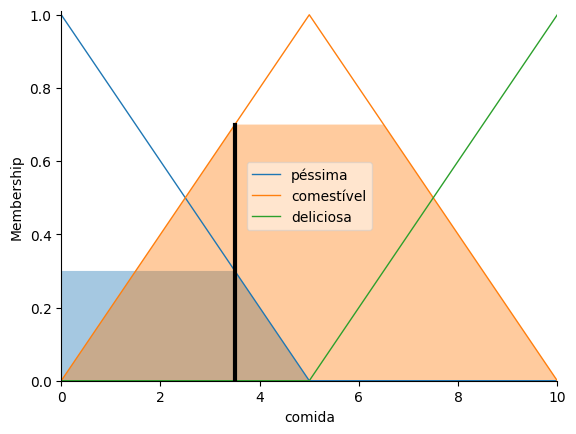

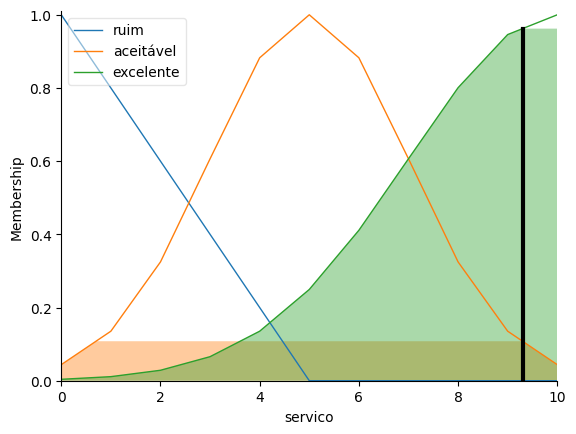

In [10]:
comida.view(sim=gorjeta_simulador)
servico.view(sim=gorjeta_simulador)